 To predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

In [14]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:

#Load the dataset
df = pd.read_csv('diabetes_dataset.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.shape

(768, 9)

 we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

In [17]:
#Let's create arrays for features/attributes and target/class
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [19]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [20]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #print("Training accuracy for",i,"is", train_accuracy[i])
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    test_accuracy[i]
    print("Accuracy for",i+1,"is", test_accuracy[i])

Accuracy for 1 is 0.6785714285714286
Accuracy for 2 is 0.6948051948051948
Accuracy for 3 is 0.685064935064935
Accuracy for 4 is 0.7077922077922078
Accuracy for 5 is 0.7012987012987013
Accuracy for 6 is 0.724025974025974
Accuracy for 7 is 0.7305194805194806
Accuracy for 8 is 0.7012987012987013
Accuracy for 9 is 0.7142857142857143
Accuracy for 10 is 0.7207792207792207
Accuracy for 11 is 0.7142857142857143
Accuracy for 12 is 0.7077922077922078
Accuracy for 13 is 0.7077922077922078
Accuracy for 14 is 0.7305194805194806
Accuracy for 15 is 0.7305194805194806
Accuracy for 16 is 0.7337662337662337
Accuracy for 17 is 0.7207792207792207
Accuracy for 18 is 0.7337662337662337
Accuracy for 19 is 0.724025974025974


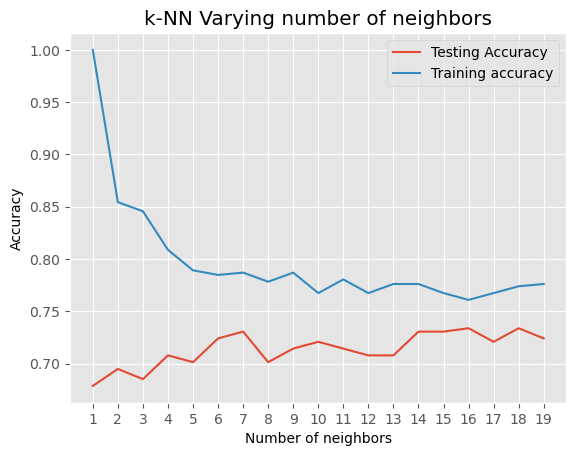

In [21]:
#Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1, 20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7305194805194806

<u><b> Confusion Matrix </b></u>

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [24]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [25]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

Confusion matrix can also be obtained using crosstab method of pandas.

In [26]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


<b> ROC (Reciever Operating Charecteristic) curve </b>

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [27]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict= knn.predict(X_test)
for i in range(100):
    print(y_test[i],y_predict[i],y_pred_proba[i],"\n")
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

0 0 0.0 

0 0 0.0 

0 1 0.7142857142857143 

0 0 0.14285714285714285 

0 0 0.0 

0 0 0.0 

0 0 0.2857142857142857 

0 0 0.0 

1 1 0.5714285714285714 

1 0 0.2857142857142857 

0 0 0.0 

0 0 0.14285714285714285 

1 0 0.14285714285714285 

0 0 0.14285714285714285 

0 0 0.0 

1 1 1.0 

0 0 0.14285714285714285 

1 1 0.8571428571428571 

0 0 0.2857142857142857 

0 0 0.0 

1 1 0.7142857142857143 

1 0 0.0 

1 1 1.0 

0 0 0.0 

0 0 0.0 

0 0 0.0 

0 1 0.5714285714285714 

1 1 0.5714285714285714 

0 1 0.5714285714285714 

1 1 0.8571428571428571 

0 0 0.0 

0 0 0.2857142857142857 

0 0 0.0 

0 1 0.7142857142857143 

0 1 0.7142857142857143 

0 0 0.42857142857142855 

0 1 0.7142857142857143 

1 1 0.5714285714285714 

0 0 0.14285714285714285 

0 0 0.0 

0 1 0.5714285714285714 

0 1 0.7142857142857143 

0 1 0.7142857142857143 

1 0 0.14285714285714285 

1 1 1.0 

0 1 0.5714285714285714 

0 0 0.42857142857142855 

0 0 0.2857142857142857 

1 0 0.42857142857142855 

0 0 0.0 

0 1 0.7142857142857143 



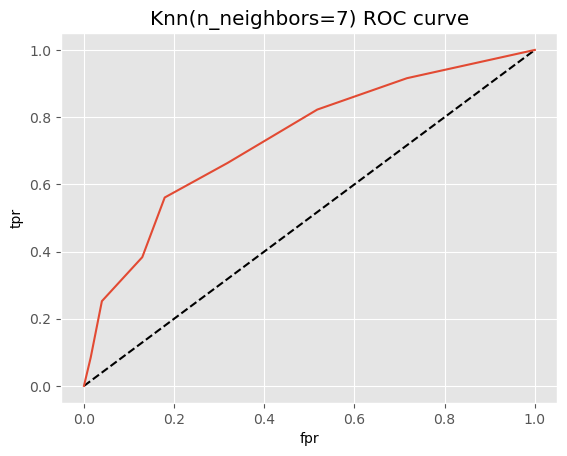

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [29]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)


0.7345050448691124

Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [30]:
#import GridSearchCV
#GridSearchCV implements a “fit” and a “score” method.
from sklearn.model_selection import GridSearchCV


In [31]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [32]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [33]:
knn_cv.best_score_

0.7578558696205755

In [34]:
knn_cv.best_params_

{'n_neighbors': 14}